# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [4]:
chipo = pd.read_csv("./chipo.tsv", sep="\t")

### Step 4. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [14]:
top_items = chipo.groupby('item_name')['quantity'].sum().nlargest(5)
print(top_items)
print(type(top_items))

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64
<class 'pandas.core.series.Series'>
Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink'],
      dtype='object', name='item_name')


In [25]:
most_frec_items = chipo[chipo["item_name"].isin(top_items.index.tolist())]["item_name"]
most_frec_items

4              Chicken Bowl
5              Chicken Bowl
7             Steak Burrito
9             Steak Burrito
10      Chips and Guacamole
               ...         
4609      Canned Soft Drink
4610          Steak Burrito
4616    Chips and Guacamole
4617          Steak Burrito
4618          Steak Burrito
Name: item_name, Length: 2427, dtype: object

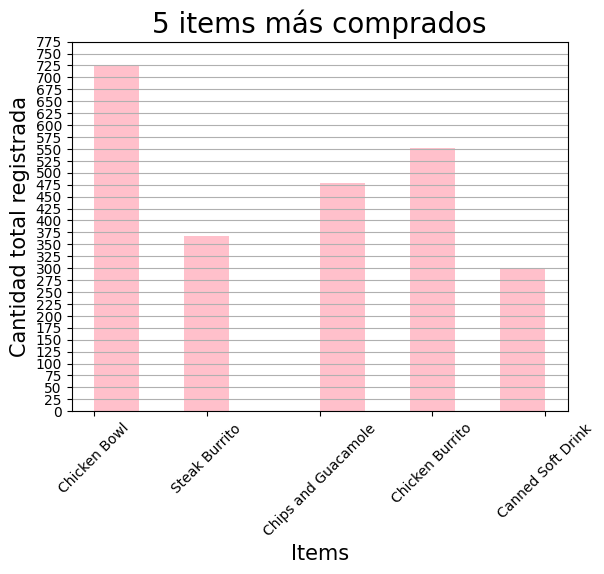

In [37]:
plt.hist(most_frec_items, color="pink")
plt.title("5 items más comprados", fontsize=20)
plt.xlabel("Items", fontsize=15)
plt.ylabel("Cantidad total registrada", fontsize=15)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 800, 25))
plt.grid(axis="y")
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [45]:
chipo["item_price"] = chipo["item_price"].str.replace("$", "")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [47]:
convert_to_float = lambda x: float(x)
chipo["item_price"] = chipo["item_price"].apply(convert_to_float)
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [56]:
items_ordered = chipo.groupby("order_id").sum()
items_ordered.head()

,quantity,item_name,choice_description,item_price
order_id,,,,
1,4,Chips and Fresh Tomato SalsaIzzeNantucket Nect...,[Clementine][Apple],11.56
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
3,2,Chicken BowlSide of Chips,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",12.67
4,2,Steak BurritoSteak Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",21.00
5,2,Steak BurritoChips and Guacamole,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",13.70


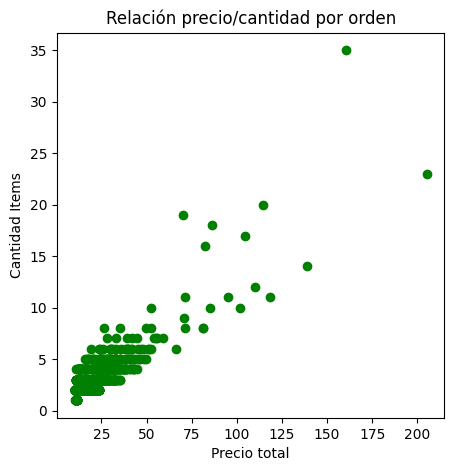

In [62]:
plt.figure(figsize=[5,5])
plt.scatter(items_ordered.item_price, items_ordered.quantity, color="green")
plt.ylabel("Cantidad Items")
plt.xlabel("Precio total")
plt.title("Relación precio/cantidad por orden")
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.